In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d_train=pd.read_csv("C:/Users/dheer/Desktop/Deep_Learning_A_Z/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv")

In [3]:
d_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train=d_train.iloc[:, 1:2].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range =(0,1))
scaled_train=sc.fit_transform(train)

In [6]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(scaled_train[i-60:i, 0])
    y_train.append(scaled_train[i, 0])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [7]:
#converting it into a 3D input coz rnn cans take 3d ip oly
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [8]:
x_train.shape

(1198, 60, 1)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.
C:\Users\dheer\AppData\Local\Continuum\anaconda3\ANACONDA2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
regressor=Sequential()

In [11]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
    

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [12]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
    

In [13]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
    

In [14]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [15]:
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))
    

In [16]:
regressor.add(Dense(units=1))

In [17]:
regressor.compile(optimizer='adam',loss ='mean_squared_error')

In [18]:
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 9s - loss: 0.0658     
Epoch 2/100
1198/1198 [==============================] - 6s - loss: 0.0075     
Epoch 3/100
1198/1198 [==============================] - 6s - loss: 0.0064     
Epoch 4/100
1198/1198 [==============================] - 6s - loss: 0.0056     
Epoch 5/100
1198/1198 [==============================] - 6s - loss: 0.0054     
Epoch 6/100
1198/1198 [==============================] - 7s - loss: 0.0053     - ETA: 0s - loss: 0.005
Epoch 7/100
1198/1198 [==============================] - 7s - loss: 0.0057     
Epoch 8/100
1198/1198 [==============================] - 6s - loss: 0.0054     
Epoch 9/100
1198/1198 [==============================] - 6s - loss: 0.0049     
Epoch 10/100
1198/1198 [==============================] - 6s - loss: 0.0047     - ETA: 0s - loss: 0.
Epoch 11/100
1198/1198 [==============================] - 6s - loss: 0.0046     
Epoch 12/100
1198/1198 [===

In [19]:
d_test=pd.read_csv("C:/Users/dheer/Desktop/Deep_Learning_A_Z/Recurrent_Neural_Networks/Google_Stock_Price_Test.csv")

In [20]:
d_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [21]:
test=d_test.iloc[:, 1:2].values

In [22]:
test.shape


(20, 1)

In [23]:
dataset=pd.concat((d_train['Open'],d_test['Open']), axis=0)
inputs=dataset[len(dataset)-len(d_test)-60: ].values
inputs=inputs.reshape(-1,1)
inputs.shape


(80, 1)

In [24]:
inputs=sc.transform(inputs) 

In [25]:
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i, 0])
  #  y_train.append(scaled_train[i, 0])
x_test=np.array(x_test)
x_test


array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [26]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [27]:
predicted_price=regressor.predict(x_test)
predicted_price=sc.inverse_transform(predicted_price)
predicted_price

array([[787.45776],
       [784.3458 ],
       [785.7364 ],
       [787.60364],
       [791.4526 ],
       [797.9447 ],
       [802.53424],
       [802.82837],
       [802.07635],
       [801.68005],
       [801.804  ],
       [802.00574],
       [802.25275],
       [803.3014 ],
       [804.4716 ],
       [810.42   ],
       [817.88434],
       [824.72504],
       [826.52484],
       [818.6374 ]], dtype=float32)

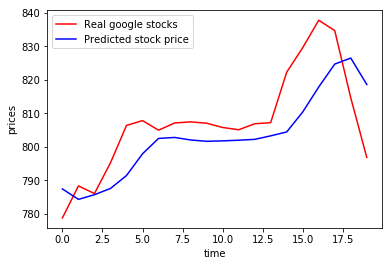

In [28]:
plt.plot(test,color='red',label='Real google stocks')
plt.plot(predicted_price,color='blue',label='Predicted stock price')
plt.xlabel('time')
plt.ylabel('prices')
plt.legend()
plt.show()